Markus Hjelland: 267195  
Dag Ruben Nordhus: 269437

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from Project_3_Functions import Sphere, create_box, create_points, create_sphere, inside_sphere, sort_points, scatter_plot, find_ratio, find_radius, RandomWalker, plot_walks, estimate_empty_space_test, estimate_sphere_test, estimate_volume, plot_2d_projection

# Asignment 3

### Task 0

In [3]:
'''
This function simply takes the desired sidelengths as the inputs and returns a numpy array with these three sidelength values. I decided to use a
box of sidelengths 1 for simplicity.
'''

box = create_box(1, 1, 1)

### Task 1

The function 'create_point' with inputs 'N' and 'box', creates N points with a uniform distribution insdide the dimensions of the box. The function generates a random point along each sidelength and that's the coordinates for the point. The output is a numpy array of length N, where each element in the array is another array, of length 3 (x, y, z).

### Task 2

In [4]:
'''
This function takes a 'box' as an input and places a sphere inside it at some random point. I decided to first generate a random point inside the
box (using create_points). Then finding the maximum radius the sphere could have, while staying entirely inside the box, based on the distance to
each of the walls of the box. The radius is a random number between this and 0. I then return an object from the sphere class, with the generated
center and radius.

i made a class called 'Sphere' to handle spheres throughout this project. An object in the Sphere class is a numpy array with a center point and
a radius.
'''

sphere = create_sphere(box)

### Task 3

The function 'inside_sphere' takes a point, a center and a radius as inputs. The function plugs the x, y and z coordinates of the point and the center in to the mathematical function for a 3D sphere. If the equation sum, given the inputs, is less than the radius squared, the point is inside the sphere with that center and diameter. The function returns a the boolean value 'True' if the point is inside and 'False' if it is not inside.

### Task 4

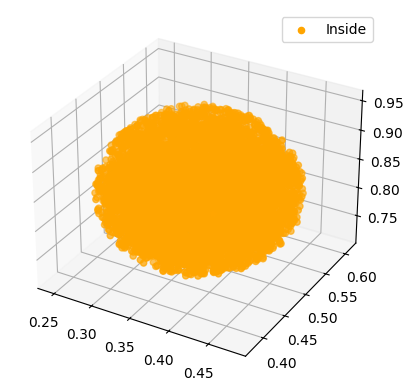

In [5]:
'''
On this task I'm initially using the 'create_points' function to generate 100 000 points inside the box. Then i'm using the function 'sort_points' to
seperate the inside points and outside points (not shown) in two separate arrays. The function takes the points and the spehere dimensions as inputs.
The function goes through each point and uses the 'inside_sphere' function to decide if they are inside or not. The points are put in their
corresponding inside and outside points lists. The ratio of inside to total points is also tracked.

I then use the function 'scatter_plot' to plot the points in a 3D scatter plot. Currently only the orange inside points are shown to better visualize
the sphere. If we wish to see the blue outside points, we can simply remove some '#' inside the function.

To know wether the results are right it's helpfull to look at the plot and the Pi estimate in the next task. The shape of the orange points in the plot
should obviously look spherical. Also, no orange point should be outside the boundries of the simulation box.
'''

points = create_points(1000000, box)
inside_points, outside_points, ratio = sort_points(points, sphere.center, sphere.radius)

scatter_plot(inside_points, outside_points)

### Task 5

In [6]:
'''
To estimate pi we need to know the ratio of inside points to total points. This ratio multiplied with the box volume gives us an estimate for the
volume of the sphere we generated inside the box. This volume plugged in to the sphere volume formula, together with the radius of the sphere, alowes
us to isolate pi and make and estimate. The more random points we generate, the more accurate the estimate will be.
'''

box_volume = box[0]*box[1]*box[2]
sphere_volume_estimate = box_volume * ratio

pi_estimate = (3/4)*(sphere_volume_estimate/sphere.radius**3)
print(f'Estimate for Pi = {pi_estimate}')


Estimate for Pi = 3.137241558318637


### Task 6

In [7]:
'''
in this cell I'm simply creating a list to contain the spheres. Then I'm using the 'create_sphere' function 10 times in a for loop and appending
the spheres to the list.
'''

spheres = []

for i in range(10):
    sphere = create_sphere(box)
    spheres.append(sphere)

### Task 7

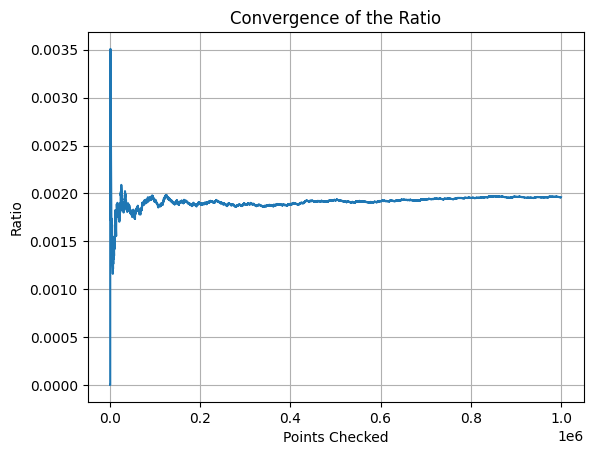

In [8]:
'''
I'm using the 'find_ratio' function to get the required data for ploting. The function takes the points i generated and the list of 10 spheres as an
input. The function goes through each point. And for every point it goes through each sphere and checks if the point is inside the sphere, using the
'inside_sphere' function. If the point is inside any of the 10 spheres, it adds 1 to the 'number_of_points_inside' counter. For each point it goes
through, it takes note of the current ratio of inside to total points (that has been checked so far) in the 'ratio' list. This is the list we plot in
the end to see the convergence as the law of large numbers does it's job. For the reults to make sense, we want the ratio to converge somewhere,
probably, far below 1. We also want to observe that the current ratio, throughout the counting, never exceeds 1, or dips below 0. I performed some
simulations with 100 and 1000 spheres instead of 10, and the ratios converged way higher, still without exceeding 1 or dipping below 0. This is what
we would expect to observe.
'''

ratio, x_values, inside_points, outside_points = find_ratio(points, spheres)

plt.plot(x_values, ratio)

plt.title('Convergence of the Ratio')
plt.xlabel('Points Checked')
plt.ylabel('Ratio')
plt.grid()
plt.show()


### Task 8

In [9]:
'''
I begin by creating an empty list of atoms. I then proceed to go through each line in the 'dna-coords.txt' file, splitting the data into 4 parts.
The element letter and the three coordinates. First I define the center by the three coordinates. Then i use the 'find_radius' function and the
element indication letter to determine the radius of the atom. All the atoms is then added to the list of atoms as objects of the Sphere class. I
also made the assumption that the coordinate system was in the unit Angstroms, as this is common for DNA helices.
'''

atoms = []

with open('dna_coords.txt', 'r') as file:
    
    for line in file:

        parts = line.split()
        center = np.array([float(parts[1]), float(parts[2]), float(parts[3])]) * 1e-10
        radius = find_radius(parts[0])

        atoms.append(Sphere(center, radius))

### Task 9

In [10]:
'''
I begin by setting the first values for x, y and z as x_min, x_max, y_min etc. I the nproceed to go through every atom, looking for smaller or
larger x, y and z values. This is all done to find the delta between the largest and smallest x, y and z coordinates, essentially finding the
dimensions of the required box to 'store' the atoms. I then create a box to fit the space the atoms cover, plus a buffer, wich is just the diameter
of the largest atom. My Box now starts from the origin and the atoms don't. Thus I will need to shift them over to fit inside the box later.
'''

x_min = x_max = ((atoms[0]).center)[0]
y_min = y_max = ((atoms[0]).center)[1]
z_min = z_max = ((atoms[0]).center)[2]

for i in range(len(atoms)):
    x, y, z = float(((atoms[i]).center)[0]), float(((atoms[i]).center)[1]), float(((atoms[i]).center)[2])

    if x < x_min:
        x_min = x
    elif x > x_max:
        x_max = x
    if y < y_min:
        y_min = y
    elif y > y_max:
        y_max = y
    if z < z_min:
        z_min = z
    elif z > z_max:
        z_max = z
    
delta_x = (x_max - x_min)
delta_y = (y_max - y_min)
delta_z = (z_max - z_min)

dna_box = create_box((delta_x + 360e-12), (delta_y + 360e-12), (delta_z + 360e-12))

### Task 10

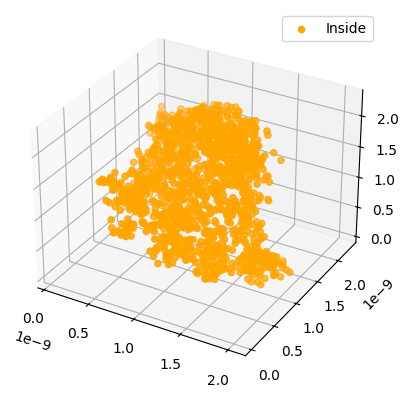

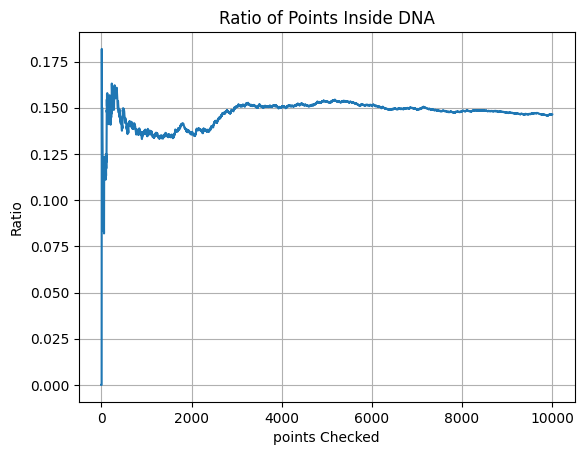

1.7263451404927733e-27
9.916964272132199e-19 8.498720723146621e-19 8.679899142705883e-19


In [11]:
'''
Before I can calculate the ratio of points inside, I need to perform the shift I was talking about in the last task. I set up a new list to store the
shifted atoms and begin going through every atom. For each atom I find it's new coordinates by shifting the old x, y and z values by the respective
x_min, y_min and z_min (minus half the buffer). This shiftes the atom structure and gives me a new set of atoms, now inside the box.

I then create the 'DNA_points' inside the 'DNA_box'. Now I can finally use the 'find_ratio' function, with the points and all the atoms, to find the
ratio of points inside the DNA structure, to the total amount of points. I also make sure to get the lists of inside points, to scatter plot them. The
visualization of the structure could clearly have been better.
'''

shifted_atoms = []

for atom in atoms:
    
    shifted_atom_x = atom.center[0] - (x_min - 180e-12)
    shifted_atom_y = atom.center[1] - (y_min - 180e-12)
    shifted_atom_z = atom.center[2] - (z_min - 180e-12)

    shifted_atoms.append(Sphere(np.array([np.array([shifted_atom_x, shifted_atom_y, shifted_atom_z])]), atom.radius))

dna_points = create_points(10000, dna_box)
dna_ratio, x_values, dna_inside_points, dna_outside_points = find_ratio(dna_points, shifted_atoms)

scatter_plot(dna_inside_points, dna_outside_points)


'''
I also wanted to make sure that I'm simulating enough points. I do this by plotting the ratio of inside points to total points. When this value is
converging, we know that larger simulations likely wouldn't affect the final result a lot. It seems to be pretty stable after 10000 points.
'''

plt.plot(x_values, dna_ratio)

plt.title('Ratio of Points Inside DNA')
plt.xlabel('points Checked')
plt.ylabel('Ratio')
plt.grid()
plt.show()


'''
Now let's look at the ratios and volumes! The total volume of the box is easy to find based on the dimensions. We then calculate the estimated volume
of the DNA structure by multiplying the total volume and the ratio of inside points to total points. I also calculate the crossectional area of the
DNA, to compare with biological data. According to wikipedia the diameter of a DNA helix is 22 - 26 Angstroms, or 2.2 - 2.6 nm. A diameter of
2.2 square nm makes an area of approximately 3.8 square nm. 3.8 square nm makes 3.8 * 10^(-18) square meters. We want our values to be smaller than
this, as a helix is hollow through the middle. As the helix is hard to see propperly in our plot, I'm simply going to look at the average crossectional
area in all planes.

Our results seems to be around 1/4 of the values stated previously, wich is good. This means our results are at the very least inside a range of
plausible solutions.
'''

dna_box_volume = dna_box[0]*dna_box[1]*dna_box[2]
dna_volume = dna_box_volume * dna_ratio[-1]

print(dna_volume)

crossectional_area_x = dna_volume/delta_x
crossectional_area_y = dna_volume/delta_y
crossectional_area_z = dna_volume/delta_z

print(crossectional_area_x, crossectional_area_y, crossectional_area_z)

## Topic 2
### Task 1


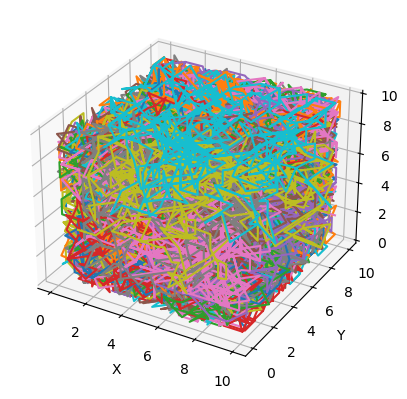

In [17]:
bounds_min = [0,0,0]
bounds_max = [10,10,10]

rw = RandomWalker(n_walkers = 100, n_steps = 500, bounds_min=bounds_min, bounds_max = bounds_max)
walkers = rw.generate_walkers()
paths =  rw.walk(walkers)

plot_walks(paths, bounds_min, bounds_max)

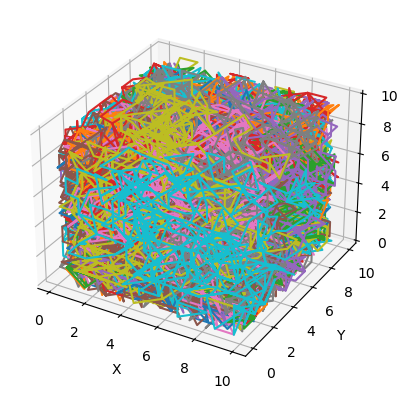

In [18]:
bounds_min = [0,0,0]
bounds_max = [10,10,10]

rw = RandomWalker(n_walkers = 100, n_steps = 500, bounds_min=bounds_min, bounds_max = bounds_max)
walkers = rw.generate_walkers_fast()
paths =  rw.walk_fast(walkers)

plot_walks(paths, bounds_min, bounds_max)

### Task 3

Since the goal is to calculate the physically accessible volume of DNA, it makes sense to have a probe with a radius comparable to that of an atom, that is not allowed to overlap with the atom. By splitting the given space into a 3D cell grid, comparable to the size of the probe and objects, we can use the random walker to path around the object and mark any of the cells reached without collisions as accessible, and reject any moves that leaves the bounds or collides with an object. This allows us to use Monte Carlo to say that the fraction of accessible volume is $f = \frac{\text{number of visited cells}}{\text{total number of cells}}$. The discretization of space also reduces the scope of the task tremendously.

### Task 4

We can use sanity checks in the form of test functions that simulate the walk in different scenarios with analytically known or predictable results. By having the walkers move around either an empty box or a single sphere within known bounds, we can compare the estimated results with the analytical solution. Because the space is divided into cubic cells, objects like spheres that have curved surfaces can only be approximated, which means the result will always undershoot the real value, given proper methodology is used. Increasing the resolution(smaller cell size) would increase the accuracy, but also increase the computational demands, as halving the cell size would increase the amount of cells by $2^3$. Visual inspection is also a useful aid to verify expected results in scenarios of lower complexity where a clear and expected result can be observed. 

### Task 5

Total amount of cells/volume in Angstroms:  8000
Amount of visited cells/volume in Angstroms:  7970.0
Fraction of cells visited:  0.99625


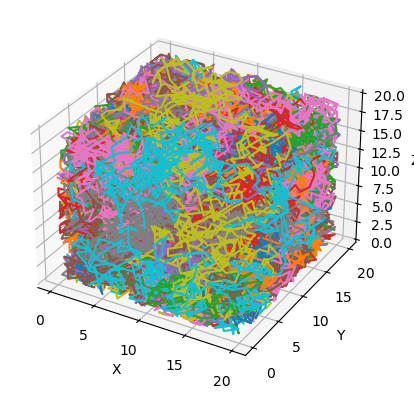

In [ ]:
#Empty space test, with parameters: n_walkers=100,n_steps=800,bounds_min=[0,0,0],bounds_max = [20,20,20],step_size=1.0,walker_radius=1.0
# fraction should be approximately 1. 
# Due to the cell size being 1, cells directly correlate to Angstroms.
estimate_empty_space_test()

total:  8000
visited:  7248.0
fraction:  0.906


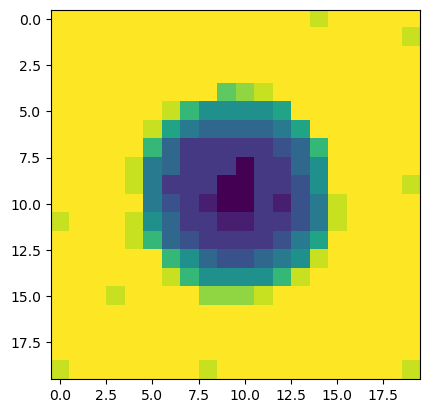

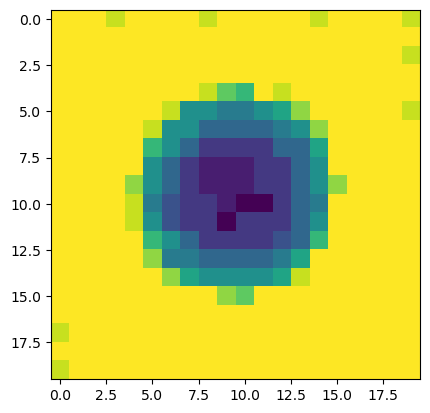

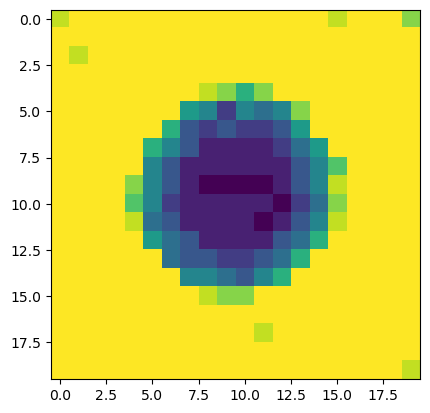

In [23]:
#Sphere test with parameters: n_walkers=100, n_steps=800,bounds_min=[0,0,0],bounds_max = [20,20,20],step_size=1.0,walker_radius=1.0, atom_cords=[[10.0,10.0,10.0]],atom_radii=[5.0]
estimate_sphere_test()

Given that we know the bounds of the space we know that  $$ V_{\text{total}} = 20*20*20 = 8000{\text{Å}^3} $$ We then calculate the volume of the sphere using $$ V_{\text{sphere}} = \frac{4}{3}\pi r^3 = \frac{4}{3}\pi 5^3 \approx 523.6{\text{Å}^3} $$ giving us the upper limit of accessible volume as $$ 8000{\text{Å}^3} - 523.6{\text{Å}^3} \approx 7476.4{\text{Å}^3} $$

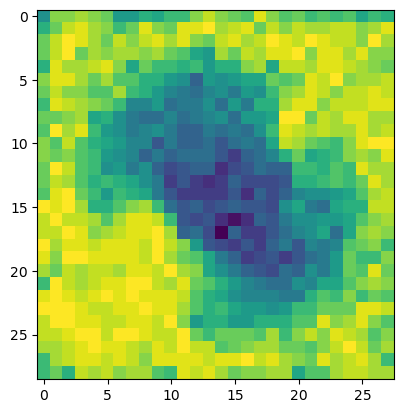

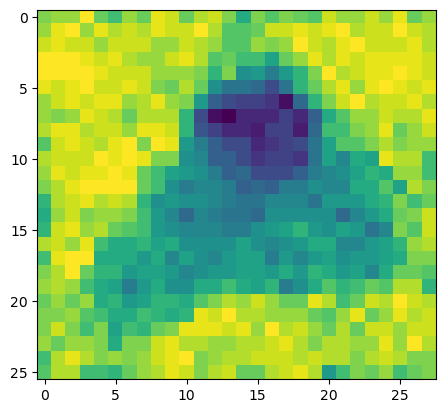

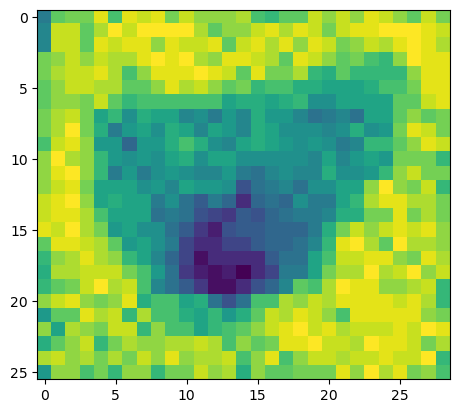

Total amount of cells/volume in Angstroms:  21112
Amount of visited cells/volume in Angstroms:  16031.0
Fraction of cells visited:  0.759331186055324


In [36]:
#use_dna_data overrides bounds/cords/radii
_, bounds_min, bounds_max, frac, v, t, grid_map = estimate_volume(n_walkers=300, n_steps=200,bounds_min=[0,0,0], bounds_max = [20,20,20],step_size=1.0, walker_radius=1.0,atom_cords=[[0,0,0]], atom_radii=[0], use_dna_data = True)
plot_2d_projection(grid_map)
print("Total amount of cells/volume in Angstroms: ", t)
print("Amount of visited cells/volume in Angstroms: ", v)
print("Fraction of cells visited: ", frac)


## Individual Contributions

I, Markus, did the tasks in topic 1.
Dag Ruben did topic 2.

## Sources

* DNA coordinates - 'dna_coords.txt'
* Atom dimensions - Periodic table from 'Project_3-1.pdf'
* DNA dimensions - Wikipedia: https://en.wikipedia.org/wiki/DNA
* No code was written by AI